## **Question: Sale Trends: Which products or categories are the most popular in terms of units sold?**

### LIBRARIES


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset path
DATA_PATH = './Data/Data.csv'

# Load the dataset
data = pd.read_csv(DATA_PATH)

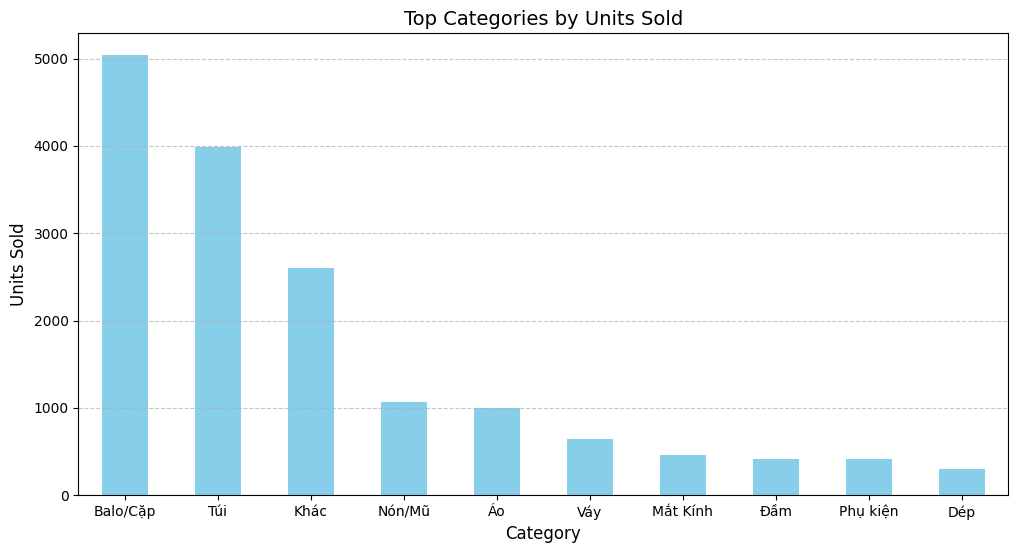

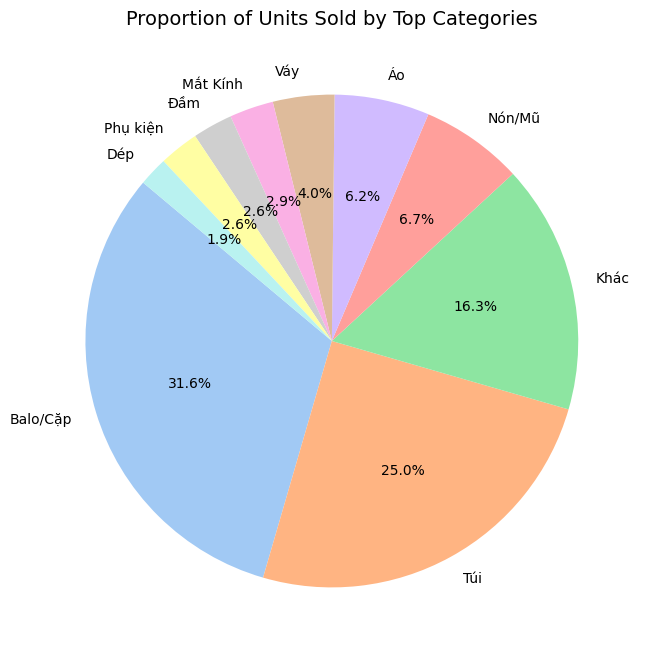

In [3]:
# Group data by Category and sum up the 'Số lượng đã bán' (Units Sold)
category_sales = data.groupby('Category')['Số lượng đã bán'].sum().sort_values(ascending=False)

# Display the top categories
top_categories = category_sales.head(10)

# Plotting the sales trends for top categories
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title("Top Categories by Units Sold", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a pie chart to visualize the proportion of units sold by top categories
plt.figure(figsize=(10, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Proportion of Units Sold by Top Categories", fontsize=14)
plt.ylabel("")  # Hide y-axis label for the pie chart
plt.show()

### **Observations from the Charts:**

1. **Bar Chart (Top Categories by Units Sold):**
   - **Backpacks (Balo/Cặp)** and **Bags (Túi)** are the leading categories in terms of units sold, contributing the most to total sales.
   - Categories such as **Others (Khác)**, **Hats (Nón/Mũ)**, and **Shirts (Áo)** have relatively high sales but are significantly lower than the top two categories.
   - Categories like **Glasses (Mắt Kính)**, **Gowns (Đầm)**, **Accessories (Phụ Kiện)**, and **Slippers (Dép)** have the lowest sales, indicating limited popularity.

2. **Pie Chart (Proportion of Units Sold by Top Categories):**
   - **Backpacks (Balo/Cặp)** account for the largest share of sales (~31.6%), followed by **Bags (Túi)** at around **25%**.
   - Other categories like **Others (Khác)**, **Hats (Nón/Mũ)**, and **Shirts (Áo)** make up smaller but still significant proportions.
   - Lower-ranked categories such as **Slippers (Dép)** and **Accessories (Phụ Kiện)** contribute very little (under 3%) to the total sales.


### **Conclusion:**
- **Answer to the question:** Which product categories are the most popular in terms of units sold?
  - **Backpacks (Balo/Cặp)** and **Bags (Túi)** are the most popular categories in terms of units sold.
  - These two categories together account for over **56%** of the total sales, highlighting their strong consumer demand.

- **Business Strategy Recommendations:**
  - Businesses should focus on investing in and promoting products in the **Backpacks** and **Bags** categories to maximize revenue.
  - For categories like **Slippers**, **Accessories**, and **Gowns**, businesses should reevaluate market demand and consider improving marketing strategies or adjusting their product offerings to boost sales.


---